In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import spacy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense,Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
import plotly.express as px 

In [3]:
#df=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv')
#df.to_csv('ufo.csv')

df=pd.read_csv('ufo.csv')
df['Shape Reported']=df['Shape Reported'].astype('category')
df['Colors Reported']=df['Colors Reported'].astype('category')
#df['State']=df['State'].astype('category')
df['Time']=pd.to_datetime(df['Time'])
#df.plot()
df=df.dropna()

le=LabelEncoder()
df['State_enc_le']=le.fit_transform(df['State'])
df=df[df.State.notnull()]
df.reset_index()
#print(df['State_enc_le'])
print(df.columns)
print(df.shape)
print(df.dtypes)
#print(df.index)


Index(['Unnamed: 0', 'City', 'Colors Reported', 'Shape Reported', 'State',
       'Time', 'State_enc_le'],
      dtype='object')
(15510, 7)
Unnamed: 0                  int64
City                       object
Colors Reported          category
Shape Reported           category
State                      object
Time               datetime64[ns]
State_enc_le                int32
dtype: object


In [4]:
ufo_no_missing = df[df["Colors Reported"].notnull() & 
          df["State"].notnull() & 
          df["Shape Reported"].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)


(15510, 7)


In [5]:
print(df.var())

Unnamed: 0      5.339361e+08
State_enc_le    2.321981e+02
dtype: float64


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:3848: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if legend and (hue is not None) and (hue not in [x, row, col]):


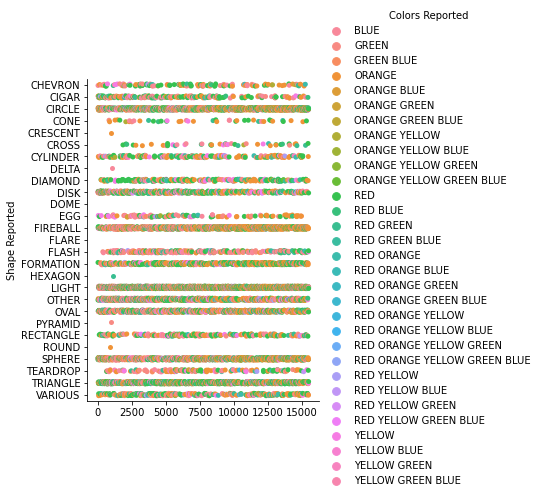

In [6]:
x=np.arange(len(df))
g = sns.catplot(x=x, y="Shape Reported", hue="Colors Reported", data=df, height=5)


Dataset Time range min=1939-06-30 20:00:00 max=2014-09-05 03:43:00


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Sightings from 2010 to 2014'}, xlabel='State', ylabel='count'>

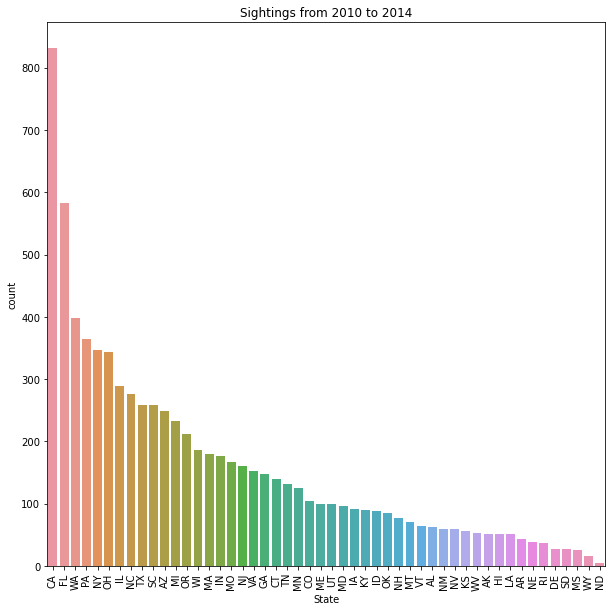

In [7]:
print("Dataset Time range min={} max={}".format(np.min(df['Time']), np.max(df['Time'])))
fig,ax=plt.subplots(figsize=(10,10))
filter=(df['Time']>='2010-01-01') &(df['Time']<='2014-10-01')
state=df[filter]['State']
plt.xticks(rotation=90)
plt.title('Sightings from 2010 to 2014')
sns.countplot(state,order = state.value_counts().index)

In [8]:
#X=pd.get_dummies(df['Shape Reported'])
#second=pd.Series(df['Colors Reported'].cat.codes)
X=df[['Shape Reported','Colors Reported']].apply(lambda x: x.cat.codes)
y=df['State_enc_le']
#print(df['State_enc_le'])

print(len(X),len(y))


15510 15510


0.08884590586718247


array([[<AxesSubplot:xlabel='Shape Reported', ylabel='Shape Reported'>,
        <AxesSubplot:xlabel='Colors Reported', ylabel='Shape Reported'>],
       [<AxesSubplot:xlabel='Shape Reported', ylabel='Colors Reported'>,
        <AxesSubplot:xlabel='Colors Reported', ylabel='Colors Reported'>]],
      dtype=object)

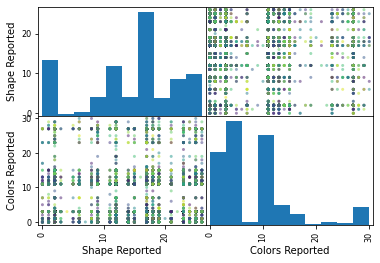

In [9]:
X_train,y_train, X_test,y_test = train_test_split(X,y,test_size=0.3, random_state=21)

knn=KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=6,p=2,weights='uniform')
#knn=KNeighborsClassifier()

#knn=KNeighborsClassifier()

#print(len(X),X)
#for item in X.iterrows():
#    print(item)

ss=StandardScaler()
X_normalized=ss.fit_transform(X)
knn.fit(X_normalized, y)
print(knn.score(X_normalized,y))
pd.plotting.scatter_matrix(X,c=y)

[0.5242649 0.4757351]


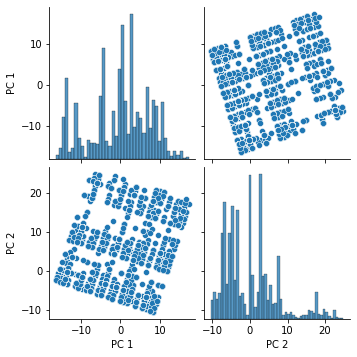

There exists a 8% accuracy for predict the state using the shape and color of the sighting


In [10]:
X=df[['Shape Reported','Colors Reported']].apply(lambda x: x.cat.codes)
y=df['State_enc_le']

pca=PCA()
transformed_X=pca.fit_transform(X)
print(pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y)

# Fit knn to the training data
knn.fit(X_train,y_train)

# Score knn on the test data and print it out
knn.score(X_test,y_test)

pc_df = pd.DataFrame(transformed_X, columns=['PC 1', 'PC 2'])

sns.pairplot(data=pc_df)
plt.show()

print('There exists a 8% accuracy for predict the state using the shape and color of the sighting')


In [11]:
#ufo_df=pd.read_csv("https://raw.githubusercontent.com/underthecurve/ufo-sightings/master/ufo.csv")
#ufo_df.to_csv("ufo-with-descriptions.csv")
#ufo_df=pd.read_csv("ufo-with-descriptions.csv")
ufo_df=pd.read_csv("ufo_id_ut.csv")
print(ufo_df.columns)
#print(ufo_df['state'].unique())

#filter=ufo_df['state'].isin(['UT','ID'])
#ufo_df=ufo_df[filter]
#ufo_df=ufo_df.dropna()
#print(ufo_df.shape)
#print(ufo_df['state'].unique())
#print(ufo_df.columns)
#ufo_df['state_idaho']=ufo_df["state"].apply(lambda x: 1 if x=='ID' else 0)
#ufo_df['state_utah']=ufo_df["state"].apply(lambda x: 1 if x=='UT' else 0)

#shape_set= pd.get_dummies(ufo_df['shape'])

#ufo_df = pd.concat([ufo_df, shape_set], axis=1)

#ufo_df=ufo_df.drop(['state','shape'],axis=1)
#print(ufo_df.head())

#ufo_df.to_csv('ufo_id_ut.csv')


Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'city', 'duration', 'summary',
       'posted', 'state_idaho', 'state_utah', 'Changing', 'Chevron', 'Cigar',
       'Circle', 'Cone', 'Cross', 'Cylinder', 'Diamond', 'Disk', 'Egg',
       'Fireball', 'Flash', 'Formation', 'Light', 'Other', 'Oval', 'Rectangle',
       'Sphere', 'Teardrop', 'Triangle', 'Unknown', 'changing', 'light',
       'other'],
      dtype='object')


In [13]:
# Look at the first 5 rows of the date column
ufo_df['date']=pd.to_datetime(ufo_df['date'],errors='coerce')
#print(ufo_df['date'].head())

# Extract the month from the date column
ufo_df["month"] = ufo_df["date"].apply(lambda x: x.month)

# Extract the year from the date column
ufo_df["year"] = ufo_df["date"].apply(lambda x:x.year)

ufo_df["hour"] = ufo_df["date"].apply(lambda x:x.hour)

# Take a look at the head of all three columns
#print(ufo_df[["date","month","year","hour"]].head())






In [14]:
def return_weights(vocab, original_vocab, vector, vector_index):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False).index
    return [original_vocab[i] for i in zipped_index]

In [15]:
#print(ufo_df['summary'].head())
nlp = spacy.load('en_core_web_sm')
stop_words=spacy.lang.en.stop_words.STOP_WORDS

vec = TfidfVectorizer(stop_words=stop_words)
summary_tfidf = vec.fit_transform(ufo_df["summary"])

#print(summary_tfidf)

shape=summary_tfidf.get_shape()
vocab= {v:k for k,v in vec.vocabulary_.items()}

#newcols_df=pd.DataFrame(columns=['weights','target'])
#ufo_df['weights']=np.empty(len(ufo_df))
ufo_df['topic']=''
topic_col=[]
weights_col=[]

index=0
for key, item in ufo_df.iterrows():
    #for index in np.arange(shape[0]):
    weights=return_weights(vocab,vec.vocabulary_,summary_tfidf,index)
    target=vocab.get(np.max(weights))
    #data=summary_tfidf[index].indices
    index+=1
    #print([vocab.get(x) for x in weights])
    topic_col.append(target)
    weights_col.append(weights)

ufo_df['topic']=topic_col
ufo_df['weights']=weights_col
#ufo_df=pd.concat([ufo_df,newcols_df],axis=1)    
#print(ufo_df.head())
#print(summary_tfidf.shape)



C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [33]:
def getShape(disk,triangle,oval,rectangle,sphere,teardrop,cross,egg):
    retVal=''
    if triangle:
        retVal="Triangle"
    elif oval:
        retVal="Oval"
    elif rectangle:
        retVal="Rectangle"
    elif sphere:
        retVal="Sphere"
    elif teardrop:
        retVal="TearDrop"
    elif cross:
        retVal="Cross"
    elif egg:
        retVal="Egg"
    elif disk:
        retVal="Disk"
    else:
        retVal="Unknown"
    return retVal

#for key,item in ufo_df[['hour','city','topic','Disk','Triangle','Oval','Rectangle','Sphere','Teardrop','Cross','Egg']].iterrows():
    #print(item.hour, item.city,item.topic,getShape(item.Disk,item.Triangle, item.Oval, item.Rectangle, item.Sphere, item.Teardrop,item.Cross,item.Egg))

print("by city and topic and hour")
fig = px.sunburst(ufo_df, path=['city','topic'],  
                   values='hour') 
fig.show()

by city and topic and hour


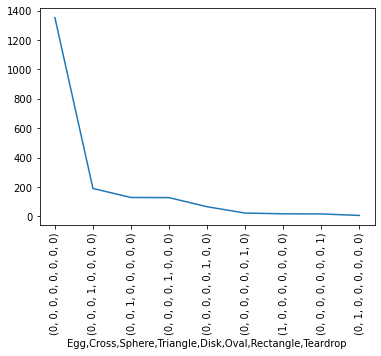

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



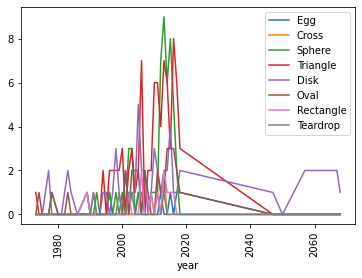

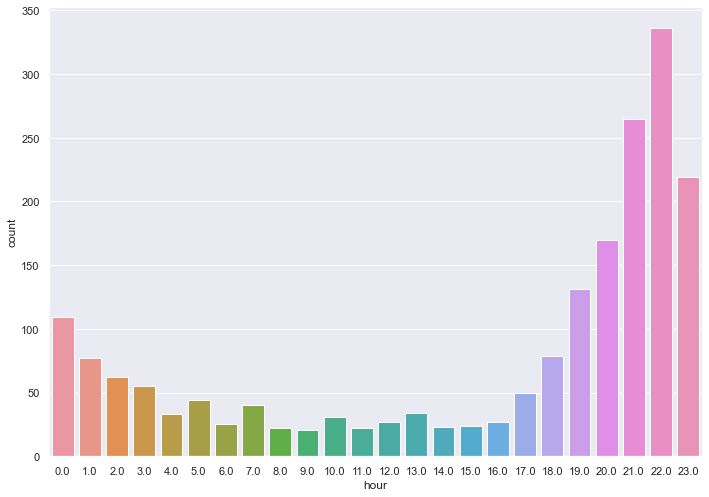

In [34]:
ufo_df[['Egg','Cross','Sphere','Triangle','Disk','Oval','Rectangle','Teardrop']].value_counts().plot()
plt.xticks(rotation=90)
plt.show()
filter=ufo_df['state_idaho']==1
grouped=ufo_df[filter].groupby(['year'])

by_year_counts=grouped['Egg','Cross','Sphere','Triangle','Disk','Oval','Rectangle','Teardrop'].sum()
by_year_counts.plot()
plt.xticks(rotation=90)
plt.show()
#print(ufo_df['hour'].value_counts())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='hour', data=ufo_df)
plt.show()

In [35]:
#print(ufo_df.columns)
COLUMNS=['city','topic','year','hour','month','Disk','Chevron','Cigar','Circle','Cone','Cross','Cylinder','Diamond','Disk','Egg','Fireball','Flash','Formation','Light','Other','Oval','Rectangle','Sphere','Teardrop','Triangle','Unknown']
X=ufo_df[COLUMNS].replace(np.nan,0)
topic_dummies=pd.get_dummies(X['topic'])
city_dummies=pd.get_dummies(X['city'])
X=pd.concat([X,topic_dummies],axis=1)
X=pd.concat([X,city_dummies],axis=1)
X=X.drop(['topic','city'],axis=1)
#print(X.columns)
y=ufo_df['state_idaho']


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
print("Most ufo sightings occur between 9pm and midnight")
print("K nearest neighbor accuracy ",knn.score(X_test,y_test))

Most ufo sightings occur between 9pm and midnight
K nearest neighbor accuracy  0.6024844720496895


In [36]:
print("Naive Bayes classification using summary text to determine state of idaho")
X=vec.fit_transform(ufo_df["summary"]).toarray()

y=ufo_df['state_idaho']
nb=MultinomialNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

nb.fit(X_train,y_train)
print("NB accuracy ",nb.score(X_test,y_test))

Naive Bayes classification using summary text to determine state of idaho
NB accuracy  0.6376811594202898


In [37]:
word_count=[]
word_count = [len(x.split()) for x in ufo_df['summary'].tolist()]
#print(words)
max_length = np.max(word_count)
vocab_size=50

docs=ufo_df["summary"]
LABELS=['Egg','Cross','Sphere','Triangle','Disk','Oval','Rectangle','Teardrop']
#LABELS=['Triangle']
target=ufo_df[LABELS]
#print([len(d) for d in docs])
encoded_docs=[one_hot(d,vocab_size) for d in docs]
#print([np.max(d) for d in encoded_docs])
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

#print([d for d in padded_docs])
model=Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded_docs, target, epochs=50, verbose=0)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [38]:
loss, accuracy = model.evaluate(padded_docs, target, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 97.019184


In [40]:
print("Keras multi output predictions based on description.  Prediction below the text. Each object confidence coefficient is included. \nn")
prediction=model.predict(padded_docs)
index=0
for key,item in ufo_df.iterrows():
    print("Egg {:.2f} Cross {:.2f} Sphere {:.2f} Triangle {:.2f} Disk {:.2f} Oval {:.2f} Rectangle {:.2f} Teardrop {:.2f}\n {} {} \n".format(prediction[index][0],prediction[index][1],prediction[index][2],prediction[index][3],prediction[index][4],prediction[index][5],prediction[index][6],prediction[index][7],getShape(item.Disk,item.Triangle, item.Oval, item.Rectangle, item.Sphere, item.Teardrop,item.Cross,item.Egg),item.summary))
    #fig,ax = plt.subplots(figsize=(6,2))
    #plt.plot(prediction[index],label=['0.Egg','1.Cross','2.Sphere','3.Triangle','4.Disk','5.Oval','6.Rectangle','7.Teardrop'])
    #plt.legend()
    #plt.show()
    index+=1

Keras multi output predictions based on description.  Prediction below the text. Each object confidence coefficient is included. 
n
Egg 0.07 Cross 0.11 Sphere 0.01 Triangle 0.47 Disk 0.11 Oval 0.07 Rectangle 0.07 Teardrop 0.11
 Unknown Seen tonight and last night from about 1:45 to 2am. In sky south east of Bonners Ferry. Bright orange yellow light fading on and off. J 

Egg 0.61 Cross 0.00 Sphere 0.03 Triangle 0.20 Disk 0.06 Oval 0.01 Rectangle 0.04 Teardrop 0.04
 Egg Egg shaped, burnished silver, no engine noise, slow moving. 

Egg 0.03 Cross 0.08 Sphere 0.18 Triangle 0.02 Disk 0.56 Oval 0.10 Rectangle 0.01 Teardrop 0.01
 Unknown Large, bright, orange light fading on and off every 15 to 20 seconds for the 1 to 1.5 minutes I observed it. 

Egg 0.07 Cross 0.00 Sphere 0.03 Triangle 0.71 Disk 0.04 Oval 0.03 Rectangle 0.03 Teardrop 0.08
 Triangle Oranges/triangular shaped aircraft, 3 circular circles on bottom thrusters three or four blue square fiery on back. 

Egg 0.05 Cross 0.00 Sphere


Egg 0.06 Cross 0.05 Sphere 0.29 Triangle 0.14 Disk 0.36 Oval 0.04 Rectangle 0.03 Teardrop 0.03
 Unknown A red light North of Boise, erratic/still, movment! 

Egg 0.08 Cross 0.03 Sphere 0.11 Triangle 0.29 Disk 0.12 Oval 0.16 Rectangle 0.13 Teardrop 0.09
 Unknown Unkn object following aircraft 

Egg 0.24 Cross 0.15 Sphere 0.02 Triangle 0.04 Disk 0.14 Oval 0.28 Rectangle 0.02 Teardrop 0.10
 Unknown Light looked like a star but bigger and brighter went across the sky semi fast got dimmer. ((NUFORC Note:  Satellite??  PD)) 

Egg 0.02 Cross 0.06 Sphere 0.31 Triangle 0.01 Disk 0.19 Oval 0.37 Rectangle 0.03 Teardrop 0.01
 Unknown saw light in the southwestern sky of Idaho around the area of greenleaf light appeared in the eastern sky then disappeared 

Egg 0.10 Cross 0.05 Sphere 0.08 Triangle 0.04 Disk 0.07 Oval 0.21 Rectangle 0.38 Teardrop 0.06
 Unknown Very bright object aprox 1000ft agl, steady west to east course, suddenly dims to complete dark.  Similar to shooting star fadeout, yet 

Eg


Egg 0.07 Cross 0.01 Sphere 0.28 Triangle 0.05 Disk 0.12 Oval 0.17 Rectangle 0.11 Teardrop 0.19
 Unknown Glowing green craft with flashing lights instantly disappeared 

Egg 0.01 Cross 0.01 Sphere 0.01 Triangle 0.05 Disk 0.89 Oval 0.02 Rectangle 0.01 Teardrop 0.00
 Disk A floating blue object with a pulsating red light in the center, it was moving slowly horizontally for a while, then it stopped and is 

Egg 0.12 Cross 0.01 Sphere 0.32 Triangle 0.09 Disk 0.06 Oval 0.12 Rectangle 0.10 Teardrop 0.17
 Unknown Bright Blue Object With Red Flashing Lights Over Utah 

Egg 0.03 Cross 0.03 Sphere 0.25 Triangle 0.04 Disk 0.47 Oval 0.13 Rectangle 0.03 Teardrop 0.04
 Disk Blue U.F.O. over American Fork Utah. 

Egg 0.02 Cross 0.03 Sphere 0.48 Triangle 0.04 Disk 0.11 Oval 0.22 Rectangle 0.06 Teardrop 0.04
 Unknown These light color was not natural at all. 

Egg 0.05 Cross 0.04 Sphere 0.24 Triangle 0.08 Disk 0.31 Oval 0.20 Rectangle 0.01 Teardrop 0.07
 Unknown They were not natural light colors. 

Eg